# **Project Title :- Identify Yours Digit Dataset**
This dataset allows you to study, analyze and recognize elements in the images. That’s
exactly how your camera detects your face, using image recognition! It’s your turn to build
and test that technique. It’s a digit recognition problem. This data set has 7,000 images of
28 X 28 size, totalling 31MB.


Problem :- Identify digits from an image

https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-digits/)

**Importing Necessary Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

import cv2
import glob
import os

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Convolution2D, BatchNormalization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Unzipping folder which contains train and test images folders and train.csv file**

In [2]:
!unzip "/content/drive/My Drive/Colab Notebooks/Train_123.zip"

Streaming output truncated to the last 5000 lines.
 extracting: Images/train/550.png    
 extracting: Images/train/5500.png   
 extracting: Images/train/5501.png   
 extracting: Images/train/5502.png   
 extracting: Images/train/5503.png   
 extracting: Images/train/5504.png   
 extracting: Images/train/5505.png   
 extracting: Images/train/5506.png   
 extracting: Images/train/5507.png   
 extracting: Images/train/5508.png   
 extracting: Images/train/5509.png   
 extracting: Images/train/551.png    
 extracting: Images/train/5510.png   
 extracting: Images/train/5511.png   
 extracting: Images/train/5512.png   
 extracting: Images/train/5513.png   
 extracting: Images/train/5514.png   
 extracting: Images/train/5515.png   
 extracting: Images/train/5516.png   
 extracting: Images/train/5517.png   
 extracting: Images/train/5518.png   
 extracting: Images/train/5519.png   
 extracting: Images/train/552.png    
 extracting: Images/train/5520.png   
 extracting: Images/train/5521.png   

**Data Preparation**

In [3]:
#loading train file
train = pd.read_csv('train.csv')
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [4]:
#info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49000 entries, 0 to 48999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  49000 non-null  object
 1   label     49000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 765.8+ KB


In [5]:
#loading test file
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test.csv")
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [6]:
#info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  21000 non-null  object
dtypes: object(1)
memory usage: 164.2+ KB


In [7]:
# sunnary of test and train data
train.describe()

,label
count,49000.000000
mean,4.452408
std,2.890206
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [8]:
test.describe()

,filename
count,21000
unique,21000
top,68308.png
freq,1


In [0]:
y_train = train['label']
x_train = train.drop('label',axis=1)

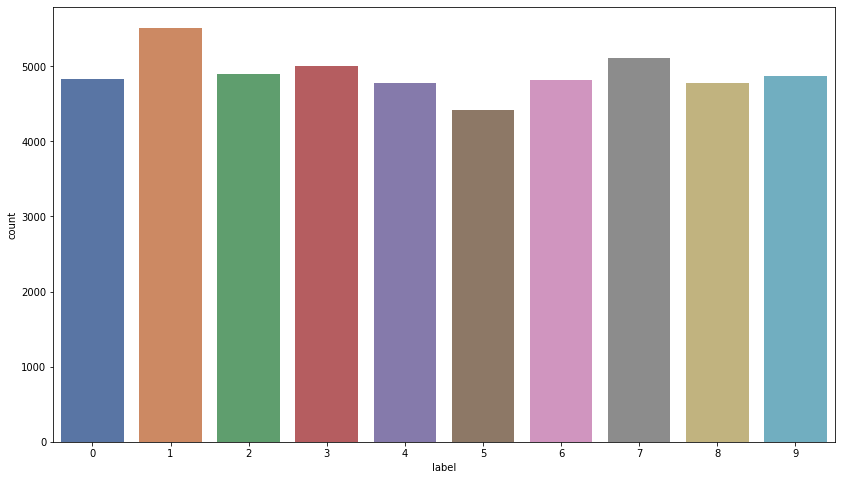

1    5514
7    5105
3    4999
2    4893
9    4871
0    4832
6    4813
8    4777
4    4777
5    4419
Name: label, dtype: int64

In [10]:
plt.figure(figsize=(14,8))
graph = sns.countplot(y_train,palette="deep")
plt.show()
y_train.value_counts()

**Checking data for any null values**

In [11]:
x_train.isnull().any().describe()

count         1
unique        1
top       False
freq          1
dtype: object

In [12]:
test.isnull().any().describe()

count         1
unique        1
top       False
freq          1
dtype: object

Therefor there is no null value in the dataset

**Function to load images in numpy array**

In [0]:
def image_load(filepath):
    i_cv=[]
    for img in sorted(glob.glob(os.path.join(filepath,'*.png')),key=lambda x:int(x.split('/')[-1].split('.')[0])):
        cv_img = cv2.imread(img)
        i_cv.append(cv_img)
    x_train = np.array(i_cv)
    return x_train

In [0]:
# loading training images
x_train = image_load('Images/train')

In [0]:
#loading testing images
x_test = image_load('Images/test')

Actual label of image is 9


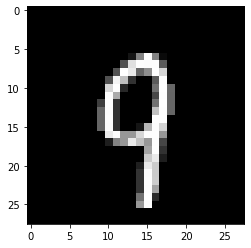

In [16]:
#checking if image is loaded successfully
plt.imshow(x_train[27700])
print(f"Actual label of image is {y_train[27700]}")

In [17]:
#checking shape of training and test dataset
print ("x_train:=====> {}".format(x_train.shape))
print ("y_train:=====> {}".format(y_train.shape))
print ("x_test: =====> {}".format(x_test.shape))

x_train:=====> (49000, 28, 28, 3)
y_train:=====> (49000,)
x_test: =====> (21000, 28, 28, 3)


**Normalization**

In [0]:
# Converting data to higher precision
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

**One hot Encoding**

In [20]:
print("Shape before one-hot encoding: ", y_train.shape)
ytrain = to_categorical(y_train)
print("Shape after one-hot encoding: ", ytrain.shape)

Shape before one-hot encoding:  (49000,)
Shape after one-hot encoding:  (49000, 10)


In [21]:
#checking shape of training and test dataset
print ("x_train:=====> {}".format(x_train.shape))
print ("ytrain:=====> {}".format(ytrain.shape))
print ("x_test: =====> {}".format(x_test.shape))

x_train:=====> (49000, 28, 28, 3)
ytrain:=====> (49000, 10)
x_test: =====> (21000, 28, 28, 3)


**Data Visualization**

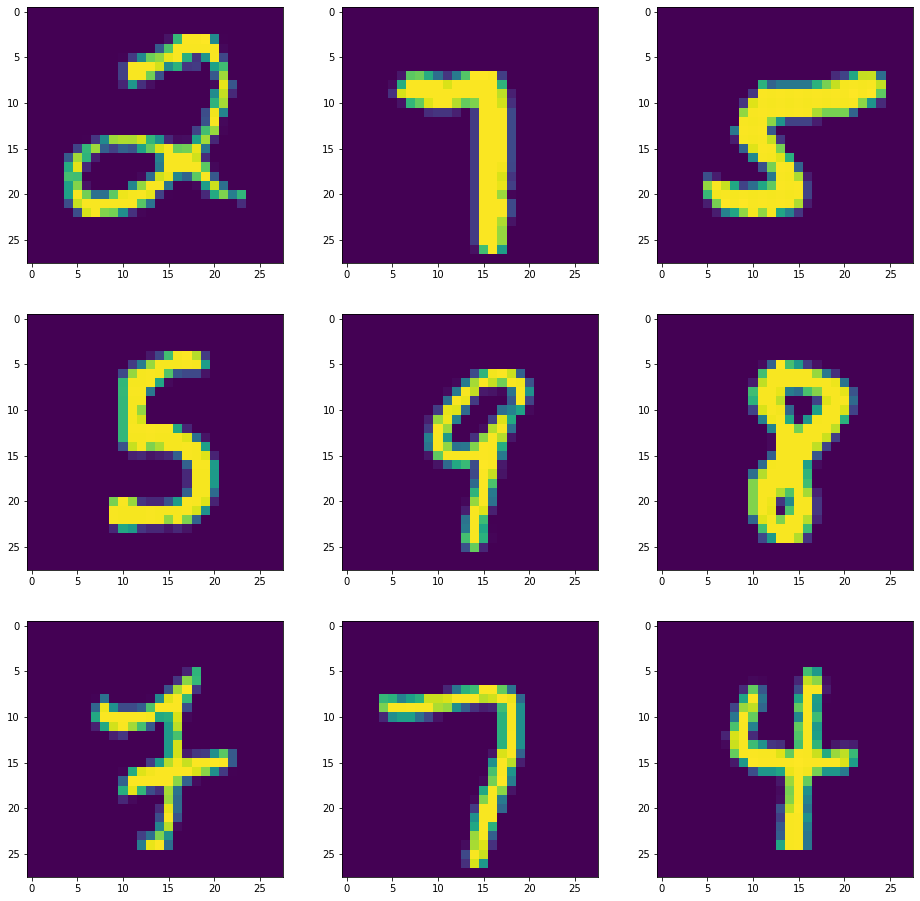

In [22]:
fig = plt.figure(figsize=(16,16))
for i in range(1,10):
  rand_num = random.randint(0,25000)
  fig.add_subplot(3,3,i)
  img_number = plt.imshow(x_train[rand_num][:,:,0])

**Building the model**

**Convolution Neural Networks**

In [0]:
# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=x_train.shape[1:]))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=2,strides=2))

# Adding a second convolutional layer
model.add(Convolution2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full Connection
model.add(Dense(units=128,activation='relu'))

# Step 5 - Output Layer
model.add(Dense(units=10,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

**Compliling the model**

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Training the model**

In [31]:
history=model.fit(x_train,ytrain,epochs=10,validation_split=0.1,batch_size=1000)

Epoch 1/10
45/45 [==============================] - 44s 982ms/step - loss: 0.7488 - accuracy: 0.7973 - val_loss: 0.2618 - val_accuracy: 0.9241
Epoch 2/10
45/45 [==============================] - 43s 953ms/step - loss: 0.1797 - accuracy: 0.9479 - val_loss: 0.1405 - val_accuracy: 0.9592
Epoch 3/10
45/45 [==============================] - 43s 953ms/step - loss: 0.1088 - accuracy: 0.9676 - val_loss: 0.1021 - val_accuracy: 0.9702
Epoch 4/10
45/45 [==============================] - 43s 947ms/step - loss: 0.0830 - accuracy: 0.9741 - val_loss: 0.0765 - val_accuracy: 0.9767
Epoch 5/10
45/45 [==============================] - 43s 956ms/step - loss: 0.0660 - accuracy: 0.9803 - val_loss: 0.0721 - val_accuracy: 0.9771
Epoch 6/10
45/45 [==============================] - 43s 946ms/step - loss: 0.0547 - accuracy: 0.9834 - val_loss: 0.0649 - val_accuracy: 0.9808
Epoch 7/10
45/45 [==============================] - 42s 941ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0570 - val_accuracy: 0.9814

**Checking the performance of neural network**

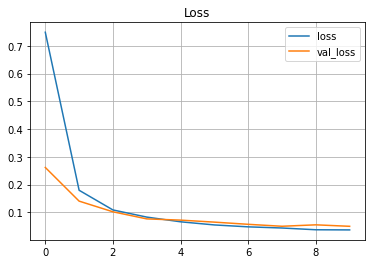

In [32]:
# plot loss during training

plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss')
plt.legend(['loss','val_loss'])
plt.grid('on')
plt.show()

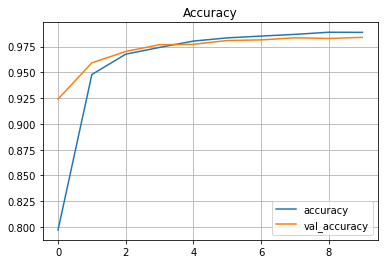

In [33]:
# plot accuracy during training

plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='Training Accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(['accuracy','val_accuracy'])
plt.grid('on')
plt.show()

**Prediction**

Actual label for 19682 observation is : 6


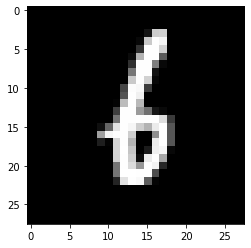

In [44]:
result = model.predict(x_test)

predicted_classes = np.argmax(np.round(result),axis=1)

#Checking random predicted value if it's predicted correctly or not
print(f'Actual label for 19682 observation is : {predicted_classes[19682]}')
plt.imshow(x_test[19682])

**Saving the test results to csv file**

In [46]:
predicted_classes=pd.DataFrame(predicted_classes)
test_df=test.join(predicted_classes)
test_df.columns=['filename','predicted_classes']
test_df.to_csv('/content/drive/My Drive/Colab Notebooks/Digits_Predictions.csv')
test_df.head()

,filename,predicted_classes
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


**Save the model**

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/my_model.h5')